In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [9]:
with open('gradcam_cpu_512.json') as json_file:
    cpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

with open('gradcam_hpu_512.json') as json_file:
    hpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

Type: <class 'dict'>
Type: <class 'dict'>


In [8]:
cpu_results

{'1': [0.25194859504699707, 0.2756693363189697, 0.2699873447418213],
 '2': [0.44094395637512207, 0.4744296073913574, 0.43804335594177246],
 '4': [0.6955013275146484, 0.8894748687744141, 0.9116332530975342],
 '8': [1.2481279373168945, 1.7603309154510498, 1.7760288715362549],
 '16': [2.57440447807312, 3.5136914253234863, 3.5156476497650146],
 '32': [5.267951965332031, 6.900628089904785, 7.016942739486694],
 '64': [10.041488409042358, 14.009527921676636, 13.477323293685913],
 '128': [20.507671356201172, 27.598479747772217, 29.847187757492065],
 '256': [40.157540798187256, 54.60897731781006, 53.882832288742065],
 '512': [81.65223813056946, 116.01560854911804, 108.23516798019409]}

In [10]:
hpu_results

{'1': [4.205038547515869, 4.502248048782349, 4.7163941860198975],
 '2': [3.036112070083618, 3.3213446140289307, 3.3111672401428223],
 '4': [0.7039511203765869, 0.645390510559082, 0.6123826503753662],
 '8': [1.0109601020812988, 1.2275011539459229, 1.182258129119873],
 '16': [1.7542061805725098, 2.1292295455932617, 2.108365774154663],
 '32': [3.2974042892456055, 4.21675968170166, 4.225637674331665],
 '64': [6.619365215301514, 8.550841093063354, 8.408239364624023],
 '128': [13.254505634307861, 16.74453830718994, 17.004977464675903],
 '256': [26.644065618515015, 34.17719841003418, 34.36649227142334],
 '512': [52.83615970611572, 68.060387134552, 68.06403541564941]}

In [25]:
x = np.array(list(cpu_results.keys())).astype(int)

In [34]:
cpu_y = {
    'dog+cat': [i[0] for i in cpu_results.values()],
    'dogs': [i[1] for i in cpu_results.values()],
    'horses': [i[2] for i in cpu_results.values()],
    'totals': [sum(i) for i in cpu_results.values()]
}
hpu_y = {
    'dog+cat': [i[0] for i in hpu_results.values()],
    'dogs': [i[1] for i in hpu_results.values()],
    'horses': [i[2] for i in hpu_results.values()],
    'totals': [sum(i) for i in hpu_results.values()]
}

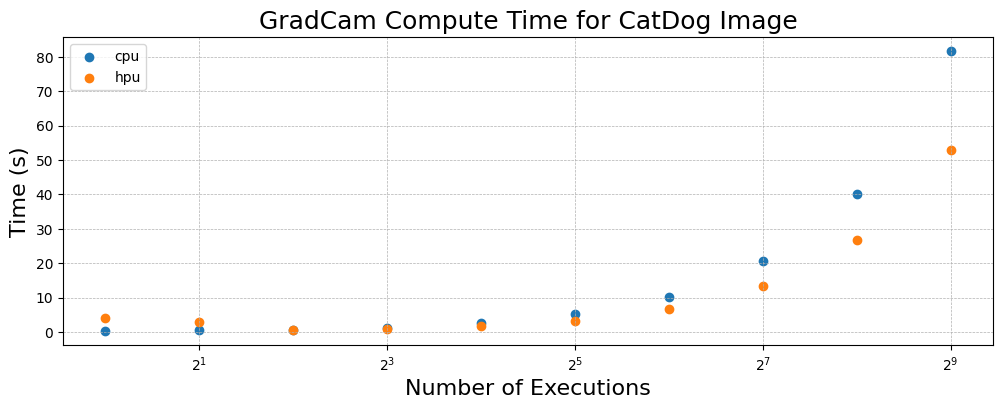

In [72]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['dog+cat'], label='cpu')
plt.scatter(x, hpu_y['dog+cat'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for CatDog Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

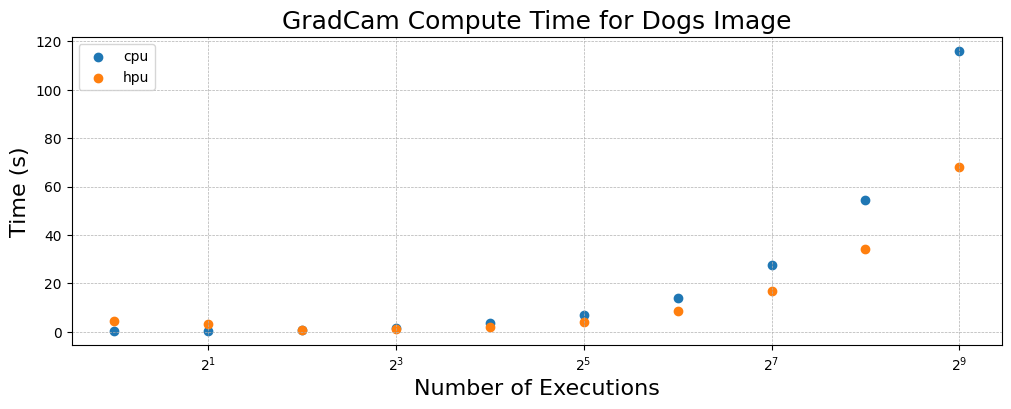

In [73]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['dogs'], label='cpu')
plt.scatter(x, hpu_y['dogs'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for Dogs Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

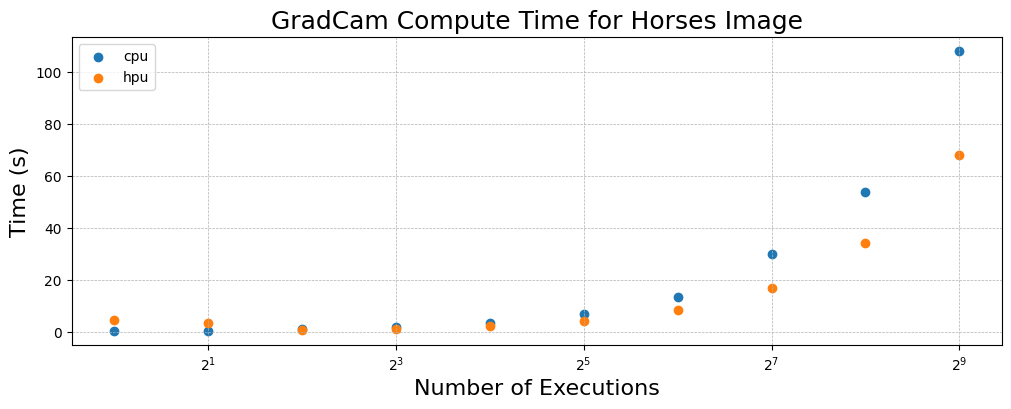

In [74]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['horses'], label='cpu')
plt.scatter(x, hpu_y['horses'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for Horses Image', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

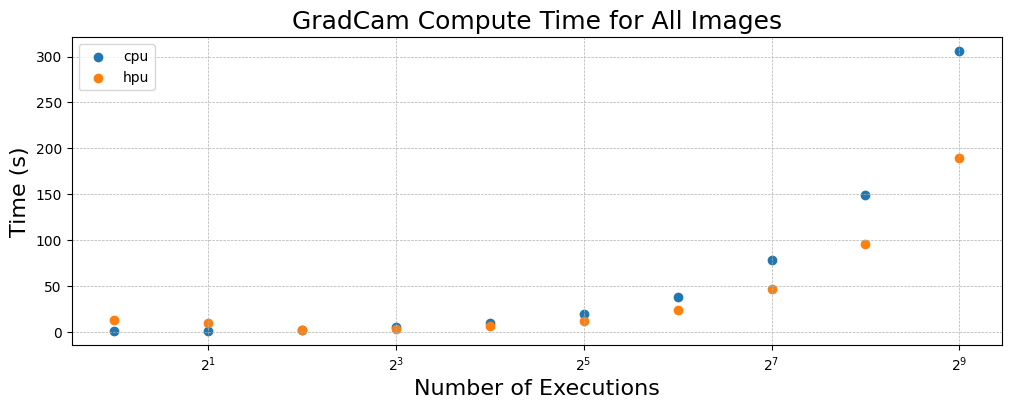

In [76]:
plt.figure(figsize=(12,4))
plt.scatter(x, cpu_y['totals'], label='cpu')
plt.scatter(x, hpu_y['totals'], label='hpu')
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Number of Executions', fontsize=16)
plt.title('GradCam Compute Time for All Images', fontsize=18)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=.5)
plt.show()

In [115]:
def percent_difference(value1, value2):
    try:
        # Calculate the percent difference
        percent_diff = (value1 - value2) / ((value1 + value2) / 2) * 100
        return percent_diff
    except ZeroDivisionError:
        # Handle the case where the denominator is zero
        return "Error: Division by zero"

# modified version of this that you can apply on a data frame
def pct_diff(x):
  change = abs((df[x] - df[x].shift(1))/((df[x] +df[x].shift(1))/2))
  return change

In [118]:
percent_difference(perc_diff['CPU'][8], perc_diff['HPU'][8])

np.float64(33.24153360093073)

In [138]:
import pandas as pd
perc_diff = pd.DataFrame({
    'N of Executions': np.array(x).astype(int),
    'CPU': cpu_y['totals'],
    'HPU': hpu_y['totals'],
    'HPU:CPU': [hpu_y['totals'][i]/cpu_y['totals'][i] for i in range(10)]
}).set_index('N of Executions')

In [139]:
perc_diff

,CPU,HPU,HPU:CPU
N of Executions,,,
1,0.797605,13.423681,16.829980
2,1.353417,9.668624,7.143862
4,2.496609,1.961724,0.785755
8,4.784488,3.420719,0.714960
16,9.603744,5.991802,0.623903
32,19.185523,11.739802,0.611909
64,37.528340,23.578446,0.628284
128,77.953339,47.004021,0.602976
256,148.649350,95.187756,0.640351


In [125]:
(77.953339 - 47.004021) / ((77.953339 + 47.004021) / 2) * 100

49.535806454297685

In [126]:
77.953339/47.004021*100

165.84397960336202

In [127]:
47.004021/77.953339*100

60.29763651304276

# Intel Image Classification Test Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.express as px
import pandas as pd

In [3]:
with open('cam-only_gradcam_hpu_1it_0.json') as json_file:
    hpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results))

with open('cam-only_gradcam_cpu_1it_0.json') as json_file:
    cpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

Type: <class 'dict'>
Type: <class 'dict'>


In [6]:
#cpu_list = [list(i.values())[0] for i in cpu_results['1']]
#hpu_list = [list(i.values())[0] for i in hpu_results['1']]
cpu_list = [i for i in cpu_results['1'].values()]
hpu_list = [i for i in hpu_results['1'].values()]

In [7]:
import pandas as pd
table = pd.DataFrame({
    'Device': ['CPU', 'HPU'],
    'Total Time (s)': [np.sum(cpu_list), np.sum(hpu_list)],
    'Average': [np.mean(cpu_list), np.mean(hpu_list)],
    'STD': [np.std(cpu_list), np.std(hpu_list)]
}).set_index('Device')

In [8]:
table

,Total Time (s),Average,STD
Device,,,
CPU,276.688931,0.092230,0.006921
HPU,63.678151,0.021226,0.013500


In [9]:
df = pd.DataFrame({'times (s)': cpu_list + hpu_list,
                   'device': ['cpu']*len(cpu_list) + ['hpu']*len(hpu_list)
                  })

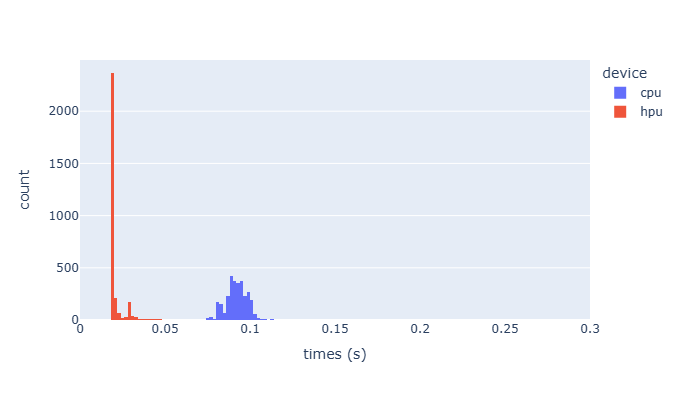

In [14]:
fig = px.histogram(df, x='times (s)', color='device', nbins=300, range_x=[0,.3], height=400)
fig

### Removing the hpu outliers (>1.4 s)

In [20]:
hpu_list = np.array(hpu_list)
hpu_list_short = hpu_list[hpu_list <= 1.4]

How many images took over 1.4 seconds:

In [21]:
len(hpu_list) - len(hpu_list_short)

258

In [23]:
hpu_results

{'1': {'24268.jpg': 3.730393409729004,
  '20723.jpg': 2.0736045837402344,
  '24310.jpg': 2.0086121559143066,
  '21288.jpg': 2.0911316871643066,
  '23037.jpg': 0.10022783279418945,
  '21017.jpg': 1.8804295063018799,
  '24256.jpg': 1.9019196033477783,
  '24282.jpg': 0.09444618225097656,
  '23136.jpg': 1.927361249923706,
  '22642.jpg': 1.9340476989746094,
  '20120.jpg': 0.09430861473083496,
  '23932.jpg': 2.0007424354553223,
  '21498.jpg': 0.09922909736633301,
  '22855.jpg': 0.09005403518676758,
  '22571.jpg': 0.09050393104553223,
  '23067.jpg': 0.09198260307312012,
  '24099.jpg': 2.025972604751587,
  '20210.jpg': 0.08469843864440918,
  '22163.jpg': 1.8806383609771729,
  '23471.jpg': 0.09543800354003906,
  '22719.jpg': 0.0896611213684082,
  '22136.jpg': 2.018016815185547,
  '24222.jpg': 1.9966928958892822,
  '23818.jpg': 1.9768610000610352,
  '20455.jpg': 2.0065863132476807,
  '22887.jpg': 0.1013484001159668,
  '20476.jpg': 1.981959581375122,
  '21154.jpg': 0.0981452465057373,
  '20117.jp

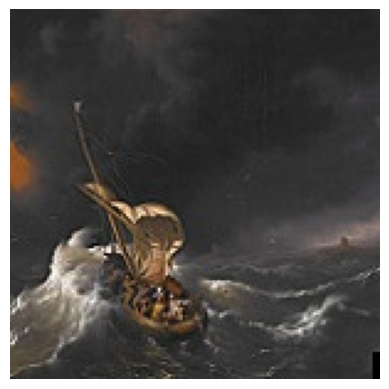

2.2532107830047607


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Took 1.5s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/20269.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['20269.jpg'])

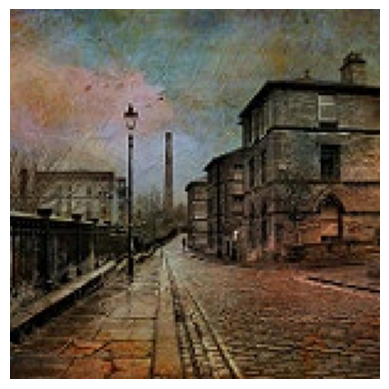

2.01114821434021


In [26]:
# Took 1.5s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/22373.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['22373.jpg'])

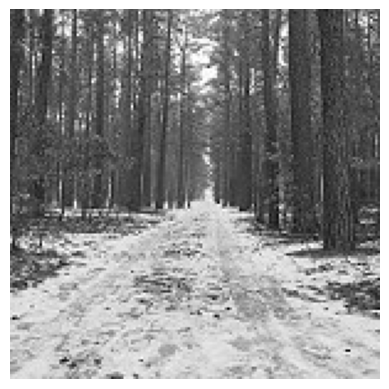

0.10341024398803711


In [27]:
# Took 1.5s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/23473.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['23473.jpg'])

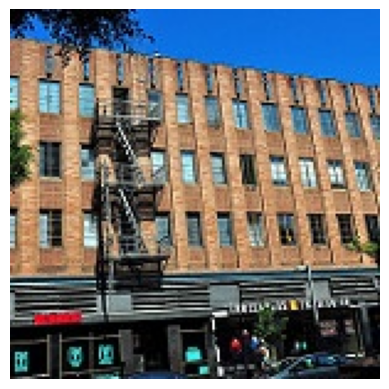

0.10356664657592773


In [28]:
# Took .08s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/20207.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['20207.jpg'])

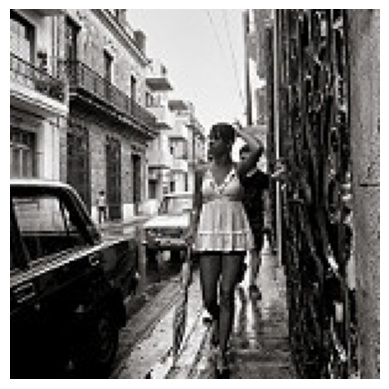

0.10122561454772949


In [29]:
# Took .08s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/22375.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['22375.jpg'])

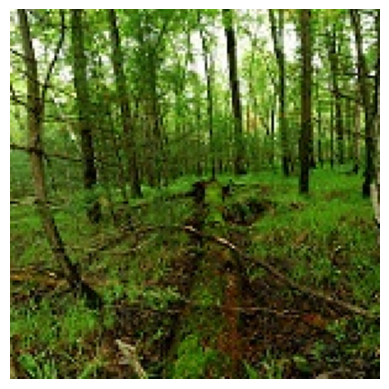

0.10204601287841797


In [30]:
# Took .08s
img = mpimg.imread('intel_image_classification_dataset/seg_test/all/21990.jpg') 

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: hide axis ticks and labels
plt.show()
print(hpu_results['1']['21990.jpg'])

### Remove the longest 258 from CPU times

In [31]:
cpu_list_short = np.sort(cpu_list)[:-258]

In [32]:
table = pd.DataFrame({
    'Device': ['CPU', 'HPU'],
    'Total Time (s)': [np.sum(cpu_list_short), np.sum(hpu_list_short)],
    'Average': [np.mean(cpu_list_short), np.mean(hpu_list_short)],
    'STD': [np.std(cpu_list_short), np.std(hpu_list_short)]
}).set_index('Device')
table

,Total Time (s),Average,STD
Device,,,
CPU,579.148635,0.211214,0.008935
HPU,267.856508,0.097687,0.008695


# Check consistency

In [29]:
with open('gradcam_hpu_1it_0.json') as json_file:
    hpu_results_1 = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results_1))

with open('gradcam_hpu_1.json') as json_file:
    hpu_results_0 = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results_0))

with open('gradcam_hpu_1it_1.json') as json_file:
    hpu_results_2 = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results_2))

with open('gradcam_hpu_1it_2.json') as json_file:
    hpu_results_3 = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results_3))

with open('gradcam_cpu_1-skx-5675.json') as json_file:
    cpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

Type: <class 'dict'>
Type: <class 'dict'>
Type: <class 'dict'>
Type: <class 'dict'>
Type: <class 'dict'>


In [44]:
cpu_list = [list(i.values())[0] for i in cpu_results['1']]
hpu_list_0 = [list(i.values())[0] for i in hpu_results_0['1']]
hpu_list_1 = [i for i in hpu_results_1['1'].values()]
hpu_list_2 = [i for i in hpu_results_2['1'].values()]
hpu_list_3 = [i for i in hpu_results_3['1'].values()]

cpu_list = np.array(cpu_list)
cpu_list_short = cpu_list[cpu_list <= 1.4]
cpu_list_long = cpu_list[cpu_list > 1.4]

hpu_list_0 = np.array(hpu_list_0)
hpu_list_0_short = hpu_list_0[hpu_list_0 <= 1.4]
hpu_list_0_long = hpu_list_0[hpu_list_0 > 1.4]

hpu_list_1 = np.array(hpu_list_1)
hpu_list_1_short = hpu_list_1[hpu_list_1 <= 1.4]
hpu_list_1_long = hpu_list_1[hpu_list_1 > 1.4]

hpu_list_2 = np.array(hpu_list_2)
hpu_list_2_short = hpu_list_2[hpu_list_2 <= 1.4]
hpu_list_2_long = hpu_list_2[hpu_list_2 > 1.4]

hpu_list_3 = np.array(hpu_list_3)
hpu_list_3_short = hpu_list_3[hpu_list_3 <= 1.4]
hpu_list_3_long = hpu_list_3[hpu_list_3 > 1.4]

n_outliers_0 = len(hpu_list_0) - len(hpu_list_0_short)
n_outliers_1 = len(hpu_list_0) - len(hpu_list_1_short)
n_outliers_2 = len(hpu_list_0) - len(hpu_list_2_short)
n_outliers_3 = len(hpu_list_3) - len(hpu_list_3_short)

print(f'{n_outliers_0=}, {n_outliers_1=}, {n_outliers_2=}, {n_outliers_3=}')

n_outliers_0=258, n_outliers_1=258, n_outliers_2=258, n_outliers_3=151


In [4]:
hpu_results_0

{'1': [{'21422.jpg': 4.084857702255249},
  {'21481.jpg': 2.016080856323242},
  {'24004.jpg': 2.0102925300598145},
  {'24236.jpg': 1.9797770977020264},
  {'24309.jpg': 1.9990530014038086},
  {'22097.jpg': 2.004559278488159},
  {'23683.jpg': 2.019132137298584},
  {'21018.jpg': 2.0406363010406494},
  {'23829.jpg': 2.0482335090637207},
  {'23377.jpg': 0.15262293815612793},
  {'22871.jpg': 0.15110445022583008},
  {'23295.jpg': 0.15677738189697266},
  {'22026.jpg': 2.012136697769165},
  {'22969.jpg': 0.13225674629211426},
  {'21814.jpg': 2.0006215572357178},
  {'20534.jpg': 0.14006781578063965},
  {'22318.jpg': 1.6052417755126953},
  {'23604.jpg': 1.8005213737487793},
  {'20916.jpg': 1.8825631141662598},
  {'21129.jpg': 2.0258021354675293},
  {'22996.jpg': 0.15114927291870117},
  {'21578.jpg': 1.77443528175354},
  {'22296.jpg': 1.8958141803741455},
  {'20439.jpg': 1.7562651634216309},
  {'23774.jpg': 1.9026050567626953},
  {'20602.jpg': 1.742387056350708},
  {'21452.jpg': 0.14841151237487793

In [5]:
hpu_results_1

{'1': {'21422.jpg': 3.995375633239746,
  '21481.jpg': 2.0317347049713135,
  '24004.jpg': 2.0282340049743652,
  '24236.jpg': 2.02844500541687,
  '24309.jpg': 2.004920721054077,
  '22097.jpg': 2.052992105484009,
  '23683.jpg': 2.0407097339630127,
  '21018.jpg': 2.034050703048706,
  '23829.jpg': 1.7398004531860352,
  '23377.jpg': 0.1424083709716797,
  '22871.jpg': 0.14537405967712402,
  '23295.jpg': 0.14537930488586426,
  '22026.jpg': 1.8608150482177734,
  '22969.jpg': 0.14675378799438477,
  '21814.jpg': 2.0051190853118896,
  '20534.jpg': 0.15925073623657227,
  '22318.jpg': 1.9512946605682373,
  '23604.jpg': 1.746826171875,
  '20916.jpg': 1.8857252597808838,
  '21129.jpg': 1.8697965145111084,
  '22996.jpg': 0.14403724670410156,
  '21578.jpg': 1.597883939743042,
  '22296.jpg': 1.9734735488891602,
  '20439.jpg': 1.7532095909118652,
  '23774.jpg': 1.9237561225891113,
  '20602.jpg': 1.9653501510620117,
  '21452.jpg': 0.1493842601776123,
  '24321.jpg': 0.13357019424438477,
  '20622.jpg': 1.689

In [6]:
hpu_results_2

{'1': {'20056.jpg': 3.960265874862671,
  '20057.jpg': 2.033954381942749,
  '20058.jpg': 2.0207724571228027,
  '20059.jpg': 2.0309770107269287,
  '20060.jpg': 2.0443437099456787,
  '20061.jpg': 2.0567786693573,
  '20062.jpg': 2.0296878814697266,
  '20064.jpg': 2.055664539337158,
  '20066.jpg': 2.065568447113037,
  '20067.jpg': 0.16236448287963867,
  '20068.jpg': 2.0663225650787354,
  '20069.jpg': 2.0796561241149902,
  '20070.jpg': 0.15969228744506836,
  '20071.jpg': 2.0529391765594482,
  '20072.jpg': 0.15922904014587402,
  '20073.jpg': 2.068512201309204,
  '20074.jpg': 2.0714058876037598,
  '20075.jpg': 2.0890133380889893,
  '20076.jpg': 2.0871689319610596,
  '20077.jpg': 2.076545238494873,
  '20078.jpg': 2.115386962890625,
  '20079.jpg': 2.081066131591797,
  '20080.jpg': 0.16051244735717773,
  '20081.jpg': 0.15520524978637695,
  '20082.jpg': 0.15609359741210938,
  '20083.jpg': 2.0669212341308594,
  '20084.jpg': 0.15554404258728027,
  '20085.jpg': 0.15590405464172363,
  '20087.jpg': 2.0

In [33]:
outliers_0 = []
for i in hpu_results_0['1']:
    if list(i.values())[0] > 1.4:
        outliers_0.append(list(i.keys())[0])

outliers_1 = []
for i in hpu_results_1['1']:
    if hpu_results_1['1'][i] > 1.4:
        outliers_1.append(i)

outliers_2 = []
for i in hpu_results_2['1']:
    if hpu_results_2['1'][i] > 1.4:
        outliers_2.append(i)

outliers_3 = []
for i in hpu_results_3['1']:
    if hpu_results_3['1'][i] > 1.4:
        outliers_3.append(i)

In [36]:
pd.set_option('display.max_rows', 300)
pd.DataFrame({'First Exp.': outliers_0,
              'First Times': hpu_list_0_long,
              'Second Exp.': outliers_1,
              'Second Times': hpu_list_1_long,
              'Ordered Exp.': outliers_2,
              'Ordered Times': hpu_list_2_long})

,First Exp.,First Times,Second Exp.,Second Times,Ordered Exp.,Ordered Times
0,21422.jpg,4.084858,21422.jpg,3.995376,20056.jpg,3.960266
1,21481.jpg,2.016081,21481.jpg,2.031735,20057.jpg,2.033954
2,24004.jpg,2.010293,24004.jpg,2.028234,20058.jpg,2.020772
3,24236.jpg,1.979777,24236.jpg,2.028445,20059.jpg,2.030977
4,24309.jpg,1.999053,24309.jpg,2.004921,20060.jpg,2.044344
5,22097.jpg,2.004559,22097.jpg,2.052992,20061.jpg,2.056779
6,23683.jpg,2.019132,23683.jpg,2.040710,20062.jpg,2.029688
7,21018.jpg,2.040636,21018.jpg,2.034051,20064.jpg,2.055665
8,23829.jpg,2.048234,23829.jpg,1.739800,20066.jpg,2.065568
9,22026.jpg,2.012137,22026.jpg,1.860815,20068.jpg,2.066323


In [10]:
len((set(outliers_0) & set(outliers_1)))

258

In [11]:
len((set(outliers_1) & set(outliers_2)))

144

In [15]:
import os

#for fname in outliers_0:
#    os.remove(os.path.join('intel_image_classification_dataset/seg_test/all_no_outliers', fname))

print(len(os.listdir('intel_image_classification_dataset/seg_test/all_no_outliers')))
len(os.listdir('intel_image_classification_dataset/seg_test/all'))

2742


3000

In [63]:
len(outliers_3)

151

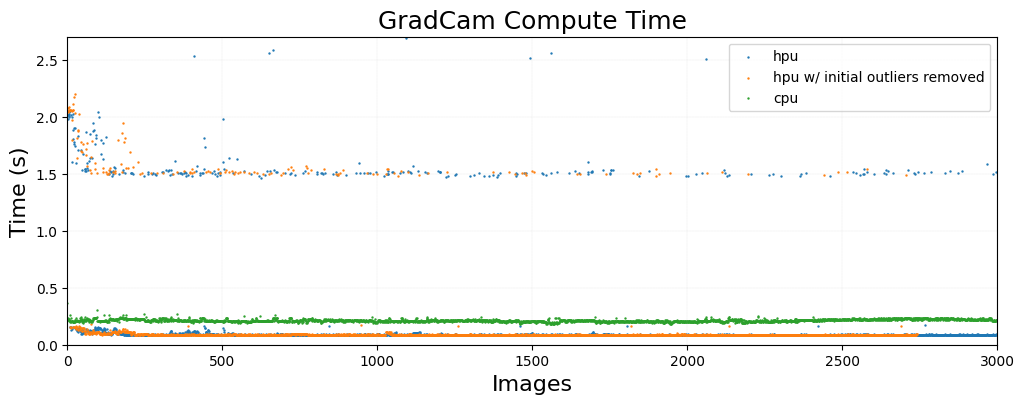

In [49]:
plt.figure(figsize=(12,4))
plt.scatter(x=range(len(hpu_list_0)), y=hpu_list_0, label='hpu', s=.5)
plt.scatter(x=range(len(hpu_list_3)), y=hpu_list_3, label='hpu w/ initial outliers removed', s=.5)
plt.scatter(x=range(len(cpu_list)), y=cpu_list, label='cpu', s=.5)
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Images', fontsize=16)
plt.title('GradCam Compute Time', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=.1)
plt.ylim([0,2.7])
plt.xlim([0,3000])
plt.show()

In [53]:
pd.DataFrame({
    'Device': ['CPU', 'HPU', 'HPU Sans Outliers'],
    'Total Time (s)': [np.sum(cpu_list), np.sum(hpu_list_0), np.sum(hpu_list_3)],
    'Average': [np.mean(cpu_list), np.mean(hpu_list_0), np.mean(hpu_list_3)],
    'STD': [np.std(cpu_list), np.std(hpu_list_0), np.std(hpu_list_3)]
}).set_index('Device')

,Total Time (s),Average,STD
Device,,,
CPU,639.675032,0.213225,0.011270
HPU,660.467434,0.220156,0.432551
HPU Sans Outliers,477.789168,0.174248,0.357571


## on seg_pred (7000 images)

In [57]:
with open('longer_gradcam_hpu_1it_0.json') as json_file:
    hpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(hpu_results))

with open('longer_gradcam_cpu_1it_0.json') as json_file:
    cpu_results = json.load(json_file)

    # Print the type of data variable
    print("Type:", type(cpu_results))

Type: <class 'dict'>
Type: <class 'dict'>


In [60]:
hpu_list = [i for i in hpu_results['1'].values()]
cpu_list = [i for i in cpu_results['1'].values()]

cpu_list = np.array(cpu_list)
cpu_list_short = cpu_list[cpu_list <= 1.4]
cpu_list_long = cpu_list[cpu_list > 1.4]

hpu_list = np.array(hpu_list)
hpu_list_short = hpu_list[hpu_list <= 1.4]
hpu_list_long = hpu_list[hpu_list > 1.4]

cpu_n_outliers = len(cpu_list) - len(cpu_list_short)
hpu_n_outliers = len(hpu_list) - len(hpu_list_short)

print(f'{cpu_n_outliers=}, {hpu_n_outliers=}')

cpu_n_outliers=0, hpu_n_outliers=371


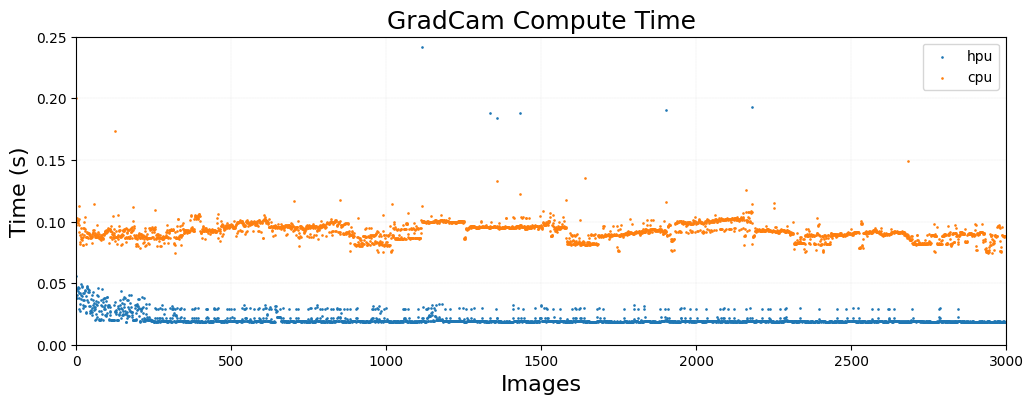

In [19]:
plt.figure(figsize=(12,4))
plt.scatter(x=range(len(hpu_list)), y=hpu_list, label='hpu', s=.8)
plt.scatter(x=range(len(cpu_list)), y=cpu_list, label='cpu', s=.8)
#plt.xticks(x)
# Add a legend
plt.legend()
plt.ylabel('Time (s)', fontsize=16)
plt.xlabel('Images', fontsize=16)
plt.title('GradCam Compute Time', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=.1)
plt.ylim([0,0.25])
plt.xlim([0,3000])
plt.show()

In [62]:
pd.DataFrame({
    'Device': ['CPU', 'HPU'],
    'Total Time (s)': [np.sum(cpu_list), np.sum(hpu_list)],
    'Average': [np.mean(cpu_list), np.mean(hpu_list)],
    'STD': [np.std(cpu_list), np.std(hpu_list)]
}).set_index('Device')

,Total Time (s),Average,STD
Device,,,
CPU,1594.622334,0.218411,0.014131
HPU,1231.677975,0.168700,0.349394
